In [1]:
#run: pip install openquantumcomputing
import sys
sys.path.insert(0, '/home/franzf/OpenQuantumComputing/OpenQuantumComputing/')
from openquantumcomputing.QAOAExactCover import QAOAExactCover

In [2]:
from qiskit import *

import numpy as np
from tailassignment_loader import *

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

from tqdm import tqdm

In [3]:
instances = 6
flights   = 24
solutions = 3

path_to_examples = "tailassignment_samples/"

FR, CR, best_sol = load_FR_CR(path_to_examples + f'FRCR_{instances}_{flights}_{solutions}.txt')

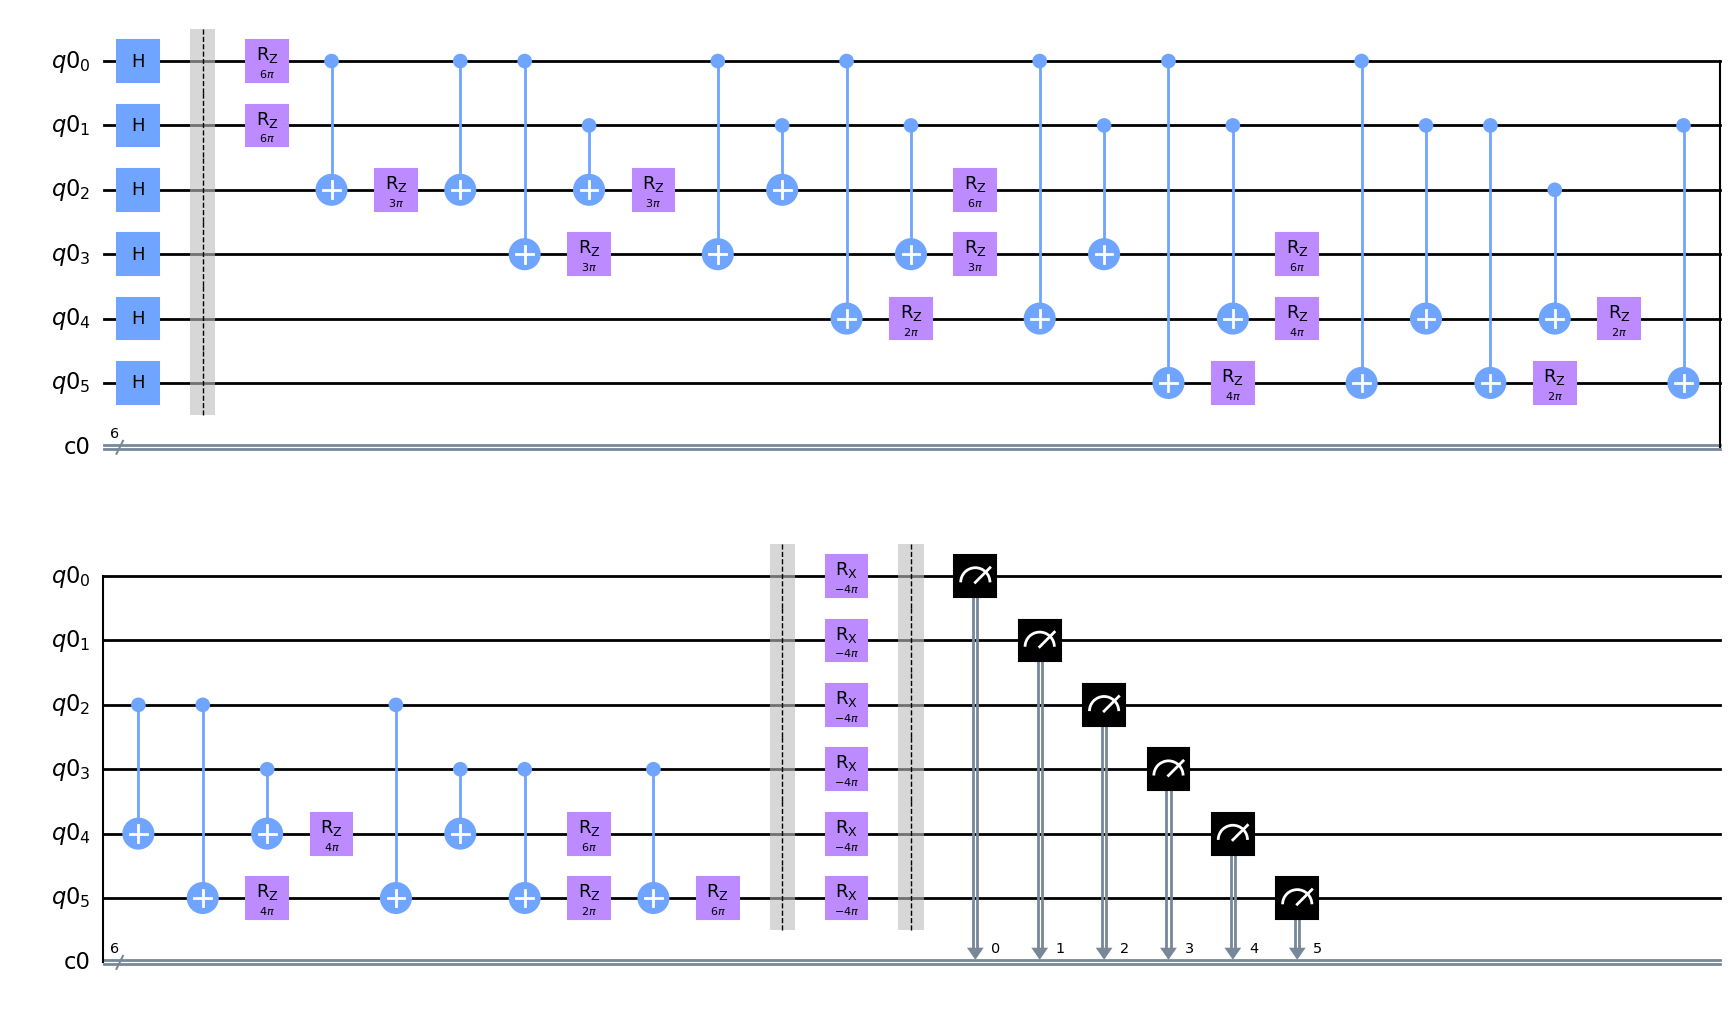

In [4]:
params={'FR': FR}
params['usebarrier']=True
qaoaec = QAOAExactCover(params=params)
qaoaec.createCircuit(np.array((np.pi,2*np.pi)),1).draw(output='mpl')

In [5]:
import itertools
print(FR)
nL=FR.shape[1]
print("solutions:")
for s in [''.join(i) for i in itertools.product('01', repeat =nL)]:
    cost=-qaoaec.cost(s)
    if cost==0:
        print(s)

[[0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]]
solutions:
000011
001100
110000


In [6]:
qasm_sim = Aer.get_backend('qasm_simulator')

In [7]:
qaoaec.sample_cost_landscape(qasm_sim, 1024, angles={"gamma": [0,np.pi,30], "beta": [0,np.pi/2,20]})

Calculating Energy landscape for depth p=1...
Calculating Energy landscape done


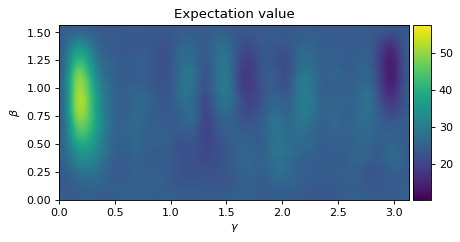

In [8]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoaec.E,interpolation='bicubic',origin='lower',extent=[0,np.pi,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

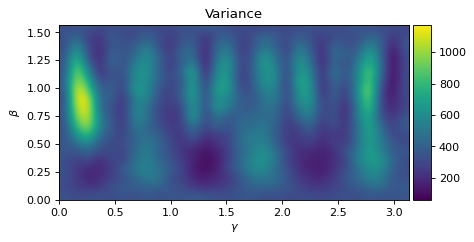

In [9]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Variance')
im = ax.imshow(qaoaec.Var,interpolation='bicubic',origin='lower',extent=[0,np.pi,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [10]:
maxdepth=10
for i in tqdm(range(maxdepth)):
    qaoaec.increase_depth(qasm_sim, 2*1024)

 10%|██████▉                                                              | 1/10 [00:00<00:07,  1.21it/s]

cost(depth= 1 )= 10.001953124999995


 20%|█████████████▊                                                       | 2/10 [00:03<00:14,  1.78s/it]

cost(depth= 2 )= 10.292968750000004


 30%|████████████████████▋                                                | 3/10 [00:07<00:21,  3.10s/it]

cost(depth= 3 )= 8.251953125


 40%|███████████████████████████▌                                         | 4/10 [00:14<00:26,  4.42s/it]

cost(depth= 4 )= 11.054687499999998


 50%|██████████████████████████████████▌                                  | 5/10 [00:23<00:29,  5.99s/it]

cost(depth= 5 )= 16.763671874999996


 60%|█████████████████████████████████████████▍                           | 6/10 [00:36<00:33,  8.44s/it]

cost(depth= 6 )= 16.826171874999996


 70%|████████████████████████████████████████████████▎                    | 7/10 [00:53<00:33, 11.30s/it]

cost(depth= 7 )= 15.132812500000002


 80%|███████████████████████████████████████████████████████▏             | 8/10 [01:18<00:31, 15.67s/it]

cost(depth= 8 )= 13.746093749999998


 90%|██████████████████████████████████████████████████████████████       | 9/10 [01:46<00:19, 19.39s/it]

cost(depth= 9 )= 14.433593749999996


100%|████████████████████████████████████████████████████████████████████| 10/10 [02:21<00:00, 14.18s/it]

cost(depth= 10 )= 9.07421875


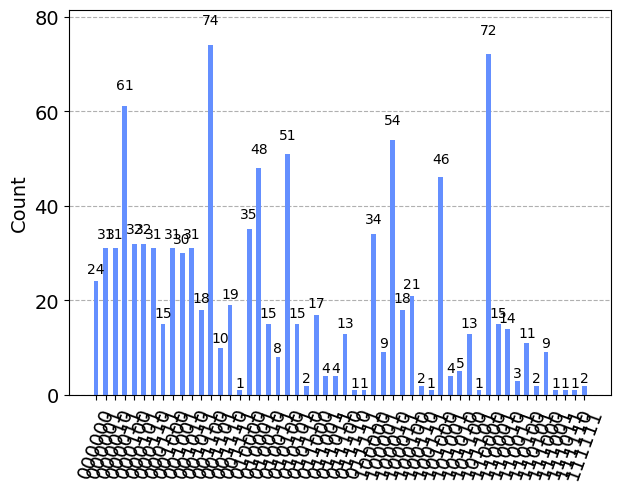

In [11]:
hist=qaoaec.hist(qaoaec.angles_hist['d1_final'], qasm_sim,1024)
plot_histogram(hist)

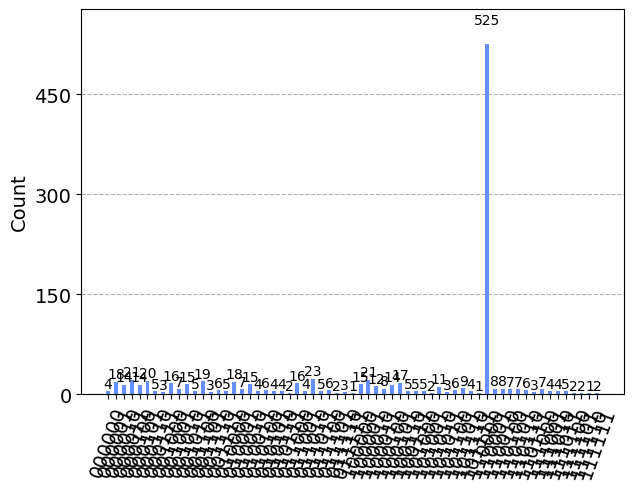

In [12]:
hist=qaoaec.hist(qaoaec.angles_hist['d10_final'], qasm_sim,1024)
plot_histogram(hist)

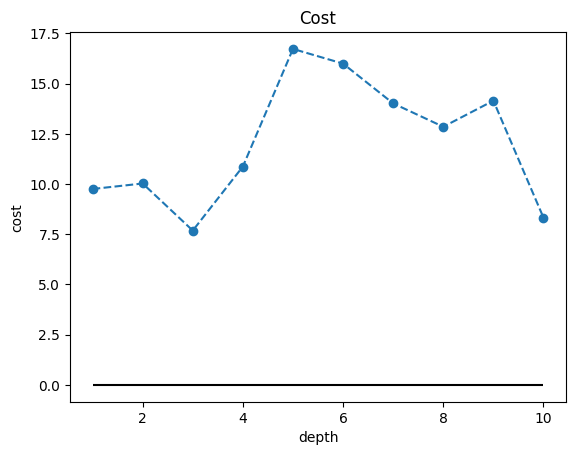

In [13]:
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoaec.costval.values())),'o--')
pl.hlines(0, 1,maxdepth, linestyles="solid", colors="black")
# pl.ylim(-0.01,1)
_=pl.title('Cost')
_=pl.ylabel('cost')
_=pl.xlabel('depth')

100%|████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.25it/s]


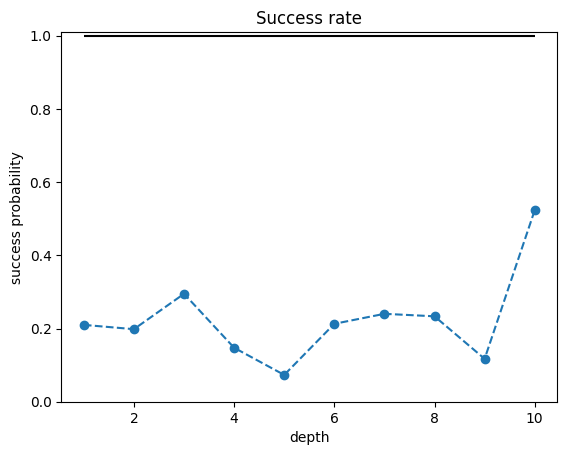

In [14]:
sp=np.zeros(maxdepth)
for i in tqdm(range(maxdepth)):
    sp[i]=qaoaec.successProbability(qaoaec.angles_hist['d'+str(i+1)+'_final'], qasm_sim,1024)
pl.plot(np.arange(1,maxdepth+1), sp,'o--')
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.ylim(0,1.01)
_=pl.title('Success rate')
_=pl.ylabel('success probability')
_=pl.xlabel('depth')

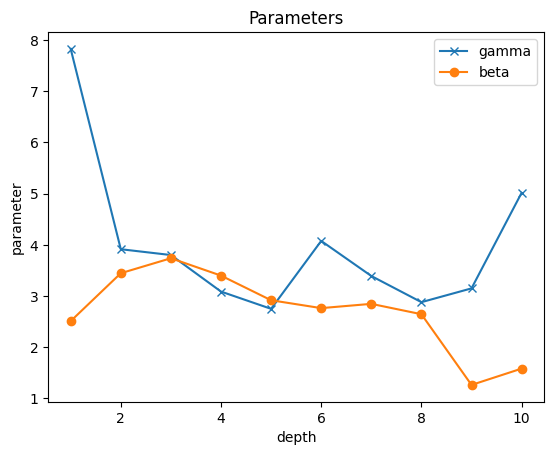

In [15]:
pl.plot(np.arange(1,maxdepth+1),qaoaec.angles_hist['d'+str(maxdepth)+'_final'][::2],"x-",label='gamma')
pl.plot(np.arange(1,maxdepth+1),qaoaec.angles_hist['d'+str(maxdepth)+'_final'][1::2],"o-",label='beta')

_=pl.title('Parameters')
_=pl.ylabel('parameter')
_=pl.xlabel('depth')
_=pl.legend()